In [ ]:
from sklearn import svm
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pops = ["V1L4E", "V1L4I", "V1L23E", "V1L23I", "V2L4E", "V2L4I", "V2L23E", "V2L23I"]
sets = ["MNIST_train","MNIST_test","CIFAR-10_test_gray","CIFAR-10_train_gray","SVHN_test","SVHN_train", "EMNIST_test","EMNIST_train","ETH80_gray_vector","CalTec101_subset"]#CalTec101_images,STL10_train,STL10_test
#sets = ["MNIST_train","MNIST_test","CIFAR-10_test_gray","CIFAR-10_train_gray","SVHN_test","SVHN_train", "ETH80_gray_vector","CalTec101_subset"]#CalTec101_images,STL10_train,STL10_test
noImgs = [60000,10000,10000,50000,26032,73257,18800,112800,3280,1233]
#conditions = ["30on", "30off", "42on", "42off", "100on", "100off"]
times = ["30", "100", "42"]
feedback = ["on","off"]
vars = ["trace","average"]
accuracies = pd.DataFrame(columns=["Dataset","Recording Time", "Feedback", "Population", "Accuracy", "Variation"])

In [ ]:
evPath = "../RESULTS/variations/"+vars[0]+"eval/"+feedback[0]+"/"

In [476]:
ds = []
for i,s in enumerate(sets):
    ds.append(np.concatenate([np.loadtxt("../DATA/"+s+"/"+str(k)) for k in range(noImgs[i])]).flatten())

In [ ]:
len(ds)

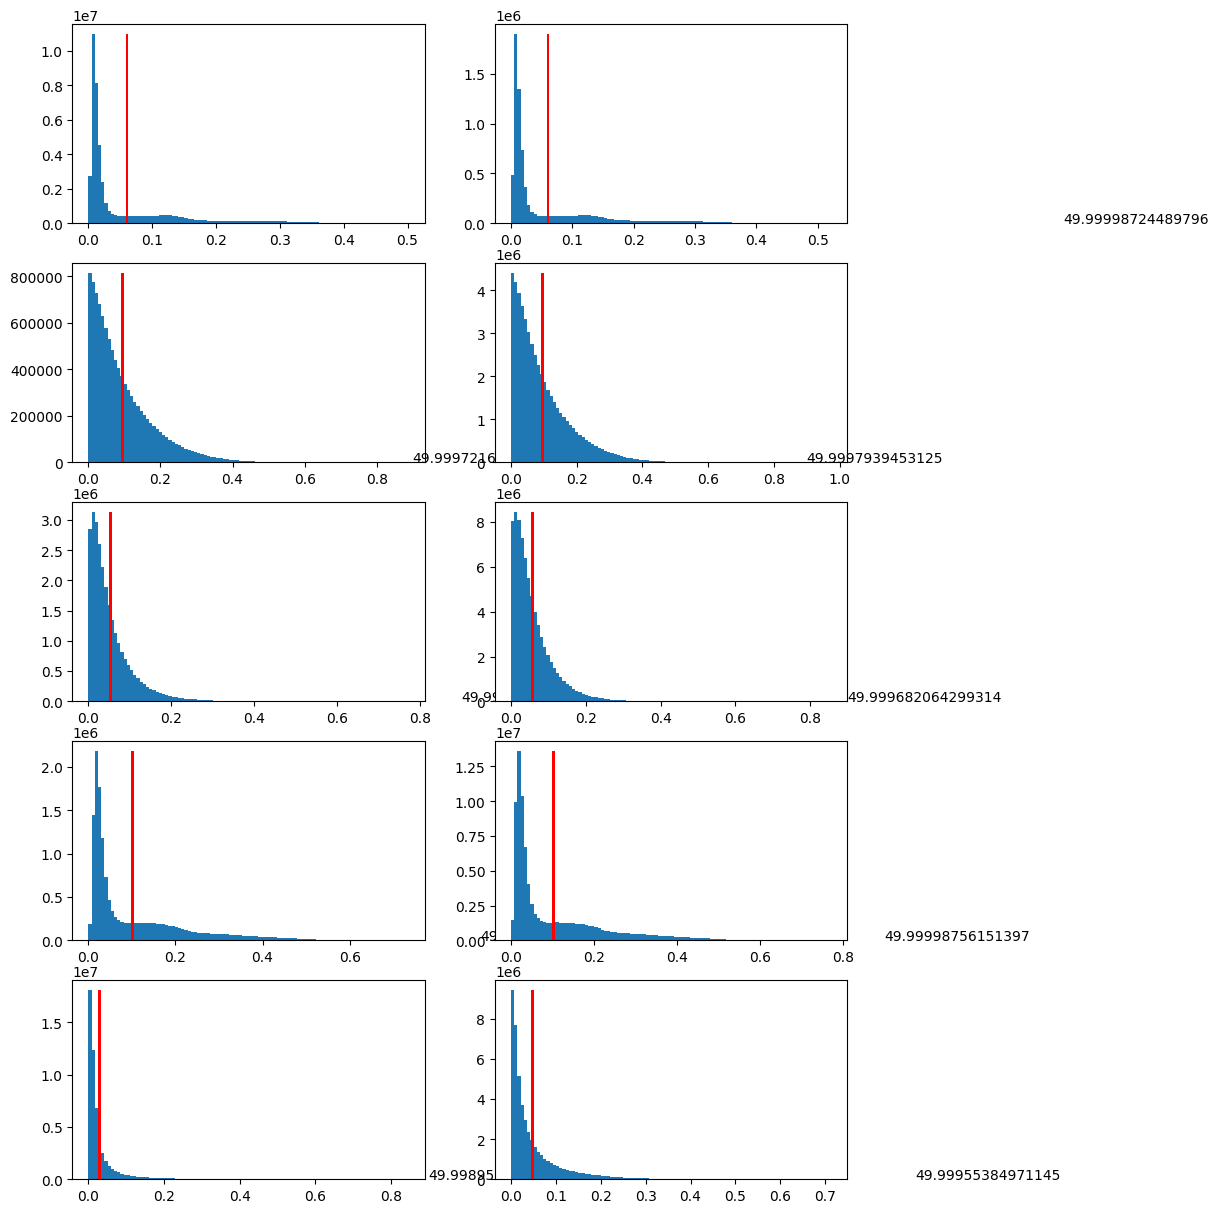

In [480]:
fig, axs = plt.subplots(5,2, figsize = (10,15))
for i,s in enumerate(ds):
    sl = len(s)
    tmp = s[s!=0]
    c, b, _ = axs.flatten()[i].hist(tmp, 100)
    axs.flatten()[i].bar(tmp.mean(), c.max(), width=b[1]*.8, color = "red")
    axs.flatten()[i].text(.9, .9, 100*len(tmp)/sl)

# Evaluation

## Cut Datasets

In [ ]:
ds = "MNIST"
testL = list(sp.io.loadmat("../DATA/"+ds+"_test_labels.mat").values())[-1].squeeze()
trainL = list(sp.io.loadmat("../DATA/"+ds+"_train_labels.mat").values())[-1].squeeze()
for f in feedback:
    for t in times:
        for p in pops:
            print("Evaluating MNIST dataset on population "+p+" in condition "+str(t)+f)
            test = np.loadtxt(evPath+ds+"_test"+str(t)+p) 
            train = np.loadtxt(evPath+ds+"_train"+str(t)+p)
            cf = svm.LinearSVC()
            cf.fit(train, trainL)
            accuracies.loc[len(accuracies)] = ["MNIST", t, f, p, 100*cf.score(test, testL), 100/len(np.unique(trainL))]
# For constant most fail to converge

In [ ]:
ds = "CIFAR-10"
testL = list(sp.io.loadmat("../DATA/"+ds+"_test_labels.mat").values())[-1].squeeze()
trainL = list(sp.io.loadmat("../DATA/"+ds+"_train_labels.mat").values())[-1].squeeze()
for f in feedback:
    for t in times:
        for p in pops:
            print("Evaluating CIFAR-10 dataset on population "+p+" in condition "+str(t)+f)
            test = np.loadtxt(evPath+ds+"_test_gray"+str(t)+p) 
            train = np.loadtxt(evPath+ds+"_train_gray"+str(t)+p)
            cf = svm.LinearSVC()
            cf.fit(train, trainL)
            accuracies.loc[len(accuracies)] = ["CIFAR-10", t, f, p, 100*cf.score(test, testL), 100/len(np.unique(trainL))]

In [ ]:
ds = "SVHN"
testL = list(sp.io.loadmat("../DATA/"+ds+"_test_labels.mat").values())[-1].squeeze()
trainL = list(sp.io.loadmat("../DATA/"+ds+"_train_labels.mat").values())[-1].squeeze()
for f in feedback:
    for t in times:
        for p in pops:
            print("Evaluating SVHN dataset on population "+p+" in condition "+str(t)+f)
            test = np.loadtxt(evPath+ds+"_test"+str(t)+p) 
            train = np.loadtxt(evPath+ds+"_train"+str(t)+p)
            cf = svm.LinearSVC()
            cf.fit(train, trainL)
            accuracies.loc[len(accuracies)] = ["SVHN", t, f, p, 100*cf.score(test, testL), 100/len(np.unique(trainL))]

In [ ]:
ds = "EMNIST"
testL = list(sp.io.loadmat("../DATA/"+ds+"_test_labels.mat").values())[-1].squeeze()
trainL = list(sp.io.loadmat("../DATA/"+ds+"_train_labels.mat").values())[-1].squeeze()
for f in feedback:
    for t in times:
        for p in pops:
            print("Evaluating EMNIST dataset on population "+p+" in condition "+str(t)+f)
            test = np.loadtxt(evPath+ds+"_test"+str(t)+p) 
            train = np.loadtxt(evPath+ds+"_train"+str(t)+p)
            cf = svm.LinearSVC()
            cf.fit(train, trainL)
            accuracies.loc[len(accuracies)] = ["EMNIST", t, f, p, 100*cf.score(test, testL), 100/len(np.unique(trainL))]

## Tiled Datasets

In [ ]:
labels = list(sp.io.loadmat("../DATA/CalTec101_subset_labels.mat").values())[-1].squeeze()
cat1 = np.where(labels == 2)[0]
cat1 = cat1[np.random.permutation(len(cat1))]
cat2 = np.where(labels == 5)[0]
cat2 = cat2[np.random.permutation(len(cat2))]
trI = np.concatenate([cat1[:200], cat2[:200]])
teI = np.concatenate([cat1[200:], cat2[200:]])

In [ ]:
ds = "ETH80_gray_vector"
labels = list(sp.io.loadmat("../DATA/ETH80_vector_labels.mat").values())[-1].squeeze()
for v in vars:
    for f in feedback:
        evPath = "../RESULTS/variations/"+v+"/eval/"+f+"/"
        for t in times:
            for p in pops:
                print("Evaluating ETH80 dataset on population "+p+" in condition "+v+str(t)+f)
                resp = np.array([np.loadtxt(evPath+ds+"/"+str(i)+str(t)+p).flatten() for i in range(noImgs[8])])
                shuf = np.random.permutation(len(resp))

                trainL = labels[shuf][:int(len(resp)*.8)]
                train = resp[shuf][:int(len(resp)*.8)]
                testL = labels[shuf][int(len(resp)*.8):]
                test = resp[shuf][int(len(resp)*.8):]
                
                cf = svm.LinearSVC()
                cf.fit(train, trainL)
                accuracies.loc[len(accuracies)] = ["ETH80", t, f, p, 100*cf.score(test, testL), 100/len(np.unique(labels))]

In [ ]:
ds = "CalTec101_subset"
labels = list(sp.io.loadmat("../DATA/CalTec101_subset_labels.mat").values())[-1].squeeze()
for v in vars:
    for f in feedback:
        evPath = "../RESULTS/variations/"+v+"/eval/"+f+"/"
        for t in times:
            for p in pops:
                print("Evaluating CalTec101 dataset on population "+p+" in condition "+str(t)+f)
                resp = np.array([np.loadtxt(evPath+ds+"/"+str(i)+str(t)+p).flatten() for i in range(noImgs[9])])
                shuf = np.random.permutation(len(resp))
                # Train/Test split
                cat1 = np.where(labels == 2)[0]
                cat1 = cat1[np.random.permutation(len(cat1))]
                cat2 = np.where(labels == 5)[0]
                cat2 = cat2[np.random.permutation(len(cat2))]
                trI = np.concatenate([cat1[:200], cat2[:200]])
                teI = np.concatenate([cat1[200:], cat2[200:]])
                        
                trainL = labels[trI]
                train = resp[trI]
                testL = labels[teI]
                test = resp[teI]
                
                cf = svm.LinearSVC()
                cf.fit(train, trainL)
                accuracies.loc[len(accuracies)] = ["CalTec101", t, f, p, 100*cf.score(test, testL), v]

In [ ]:
print(accuracies[accuracies["Variation"]==vars[0]])
accuracies.to_csv("coso")

## Housekeeping

In [483]:
for v in vars:
    path = "../RESULTS/variations/"+v+"/"
    acc = pd.concat([pd.read_csv(path+"accuracieson.csv", index_col=0), pd.read_csv(path+"accuraciesoff.csv", index_col=0)])
    acc.drop_duplicates().to_csv(path+"accuracies.csv")

In [ ]:
path = "../RESULTS/variations/"+vars[0]+"/"
acc = pd.read_csv(path+"accuracies.csv", index_col=0)

In [ ]:
acc["trace"]

# Analysis

In [484]:
dss = ['MNIST', 'CIFAR-10', 'SVHN', 'EMNIST', 'ETH80', 'CalTec101']
chL = [10., ]
acc = {v:pd.read_csv("../RESULTS/variations/"+v+"/accuracies.csv", index_col=0) for v in vars}

## Visualisation

In [ ]:
fig, axs = plt.subplots(6,4, figsize=(15,10))
for i,s in enumerate(dss):
    chL = 
    for k,v in enumerate(vars):
        # Prep data
        tmp = acc[v]
        tmp = tmp[tmp["Dataset"]==s].reset_index()
        
        tmp = tmp[["Recording Time","Accuracy","Population","Feedback"]].pivot(index="Recording Time", values="Accuracy", columns=["Feedback","Population"])

        # On condition
        tmp["on"].reset_index(drop=True).plot(ax=axs[i][0+2*k], legend=False, xlabel="", style="o-", ylim=(0,100))
        axs[i][0+2*k].set_xticks([0,1,2],tmp["on"].index.values)
        # Off condition
        tmp["off"].reset_index(drop=True).plot(ax=axs[i][1+2*k], xlabel="", legend=False, style="o-", ylim=(0,100))
        axs[i][1+2*k].set_xticks([0,1,2],tmp["on"].index.values)
    axs[i][0].text(-.4, .5,s, transform = axs[i][0].transAxes)
    axs[i][3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=7)
    
axs[0][0].set_title("Feedback On")
axs[0][1].set_title("Feedback Off")
axs[0][2].set_title("Feedback On")
axs[0][3].set_title("Feedback Off")
fig.suptitle("Trace                                                                                                                            Average")
fig.tight_layout()

In [ ]:
s = dss[1]
chL = 0
vis = []
for v in vars:
    tmp = acc[v][acc[v]["Dataset"]==s]
    chL = tmp["Chance Level"].values[0]    
    tmp = tmp.sort_values("Feedback")
    tmp = tmp.pivot(index="Population", columns=["Feedback", "Recording Time"], values="Accuracy").round(2)
    tmp = tmp.reindex(columns=sorted(tmp.columns))
    vis.append(tmp.loc[pops])
print(s)
print(chL)
pd.concat(vis, axis=1, keys=vars)

## Condition Effects

In [485]:
print("trace condition")
tmp = acc["trace"].drop("Chance Level", axis=1).sort_values(["Feedback","Dataset","Recording Time","Population"])
fTrace = tmp["Accuracy"].values

# Feedback Effect
print("  Feedback effect")
on = tmp[tmp["Feedback"]=="on"]["Accuracy"].values
off = tmp[tmp["Feedback"]=="off"]["Accuracy"].values
print(sp.stats.ttest_rel(on, off, alternative="less"))
# Time Effect
t30 = tmp[tmp["Recording Time"]==30]["Accuracy"].values
t42 = tmp[tmp["Recording Time"]==42]["Accuracy"].values
t100 = tmp[tmp["Recording Time"]==100]["Accuracy"].values
print("    t30 > t42")
print(sp.stats.ttest_rel(t30, t42, alternative="greater"))
print("    t42 > t100")
print(sp.stats.ttest_rel(t42, t100, alternative="greater"))


print("average condition")
tmp = acc["average"].drop("Chance Level", axis=1).sort_values(["Feedback","Dataset","Recording Time","Population"])
fAvg = tmp["Accuracy"].values
# Feedback Effect
print("  Feedback effect")
on = tmp[tmp["Feedback"]=="on"]["Accuracy"].values
off = tmp[tmp["Feedback"]=="off"]["Accuracy"].values
print(sp.stats.ttest_rel(on, off, alternative="two-sided"))
# Time Effect
t30 = tmp[tmp["Recording Time"]==30]["Accuracy"].values
t42 = tmp[tmp["Recording Time"]==42]["Accuracy"].values
t100 = tmp[tmp["Recording Time"]==100]["Accuracy"].values
print("    t30 > t42")
print(sp.stats.ttest_rel(t30, t42, alternative="greater"))
print("    t42 > t100")
print(sp.stats.ttest_rel(t42, t100, alternative="greater"))
print("    t30 > t100")
print(sp.stats.ttest_rel(t30, t100, alternative="greater"))

print("Design Differences: trace greater than average")
print(sp.stats.ttest_rel(fTrace, fAvg, alternative="greater"))

trace condition
  Feedback effect
TtestResult(statistic=-7.074122302661809, pvalue=3.0880712648945284e-11, df=143)
    t30 > t42
TtestResult(statistic=2.3557644037851118, pvalue=0.010270038230987738, df=95)
    t42 > t100
TtestResult(statistic=3.6370755690648426, pvalue=0.00022400737128481295, df=95)
average condition
  Feedback effect
TtestResult(statistic=0.9291173631592256, pvalue=0.3543939783525163, df=143)
    t30 > t42
TtestResult(statistic=7.506175379596475, pvalue=1.6289962076814005e-11, df=95)
    t42 > t100
TtestResult(statistic=4.783362690738914, pvalue=3.149950991559716e-06, df=95)
    t30 > t100
TtestResult(statistic=7.6575963739662996, pvalue=7.873447167328607e-12, df=95)
Design Differences: trace greater than average
TtestResult(statistic=17.662707190872084, pvalue=4.57258541351023e-48, df=287)


In [ ]:
print("trace condition")
tmp = acc["trace"].drop("Chance Level", axis=1).sort_values(["Feedback","Dataset","Recording Time","Population"])
tmp = tmp[tmp["Dataset"]!="ETH80"]
tmp = tmp[tmp["Dataset"]!="CalTec101"]
fTrace = tmp["Accuracy"].values

# Feedback Effect
print("  Feedback effect")
on = tmp[tmp["Feedback"]=="on"]["Accuracy"].values
off = tmp[tmp["Feedback"]=="off"]["Accuracy"].values
print(sp.stats.ttest_rel(on, off, alternative="less"))
# Time Effect
t30 = tmp[tmp["Recording Time"]==30]["Accuracy"].values
t42 = tmp[tmp["Recording Time"]==42]["Accuracy"].values
t100 = tmp[tmp["Recording Time"]==100]["Accuracy"].values
print("    t30 > t42")
print(sp.stats.ttest_rel(t30, t42, alternative="greater"))
print("    t42 > t100")
print(sp.stats.ttest_rel(t42, t100, alternative="greater"))


print("average condition")
tmp = acc["average"].drop("Chance Level", axis=1).sort_values(["Feedback","Dataset","Recording Time","Population"])
tmp = tmp[tmp["Dataset"]!="ETH80"]
tmp = tmp[tmp["Dataset"]!="CalTec101"]
fAvg = tmp["Accuracy"].values
# Feedback Effect
print("  Feedback effect")
on = tmp[tmp["Feedback"]=="on"]["Accuracy"].values
off = tmp[tmp["Feedback"]=="off"]["Accuracy"].values
print(sp.stats.ttest_rel(on, off, alternative="two-sided"))
# Time Effect
t30 = tmp[tmp["Recording Time"]==30]["Accuracy"].values
t42 = tmp[tmp["Recording Time"]==42]["Accuracy"].values
t100 = tmp[tmp["Recording Time"]==100]["Accuracy"].values
print("    t30 > t42")
print(sp.stats.ttest_rel(t30, t42, alternative="greater"))
print("    t42 > t100")
print(sp.stats.ttest_rel(t42, t100, alternative="greater"))

print("Design Differences: trace greater than average")
print(sp.stats.ttest_rel(fTrace, fAvg, alternative="greater"))

In [ ]:
print("Design Differences: trace greater than average")
print(sp.stats.ttest_rel(fTrace, fAvg, alternative="greater"))



In [ ]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf

In [487]:
for v in vars:
    np.set_printoptions(precision=2)
    tmp = acc[v]
    tmp["Feedback"] = tmp["Feedback"].replace(["on","off"], [1,0])
    tmp["Population"] = tmp["Population"].replace(pops, [0,0,1,1,2,2,3,3])
    tmp = tmp[tmp["Dataset"]!="ETH80"]
    tmp = tmp[tmp["Dataset"]!="CalTec101"]
    y = tmp["Accuracy"]
    X = tmp[["Feedback", "Population", "Recording Time","Dataset"]]
    X = pd.get_dummies(X).values
    feats = pf(degree=2, include_bias=False, interaction_only=True)
    X_ = X#feats.fit_transform(X)
    mod = lr().fit(X_, y)
    print(v+" model: R^2 = "+str(mod.score(X_, y)))
#    print(feats.get_feature_names_out(["f","p","r"]))
    print(mod.coef_)
    print(mod.intercept_)

trace model: R^2 = 0.855902763257082
[ -1.41 -17.37  -0.02 -14.18   1.05  20.47  -7.33]
70.02187101359236
average model: R^2 = 0.626916253239043
[ 5.57e-03 -1.49e+01 -3.57e-02 -8.44e+00 -4.88e+00  1.23e+01  1.06e+00]
51.233166959884656
